In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [3]:
best_model_saved_dir = "/content/drive/MyDrive/Gem Classification - Research/image_based_transfer_learning/models/MobileNetV3Large/MobileNetV3Large_include_preprocessing-best_val_loss_model.h5"

In [4]:
base_model = keras.applications.MobileNetV3Large (
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False,
    include_preprocessing=True
)
base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(8)(x)
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()]
)
model.summary()

12683000/12683000 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 960)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 7688      
                                                                 
Total params: 3,004,040
Trainable params: 7,688
Non-trainable params: 2,996,352
________________________________________________

In [5]:
model.load_weights(best_model_saved_dir)

In [6]:
label_class = {
  0: 'Almandine',
  1: 'Emerald',
  2: 'Ruby',
  3: 'Sapphire',
  4: 'Spessartite',
  5: 'Topaz',
  6: 'Tourmaline',
  7: 'Zircon'
}

In [7]:
img_file_path = "/content/drive/MyDrive/Gem Classification - Research/image_based_transfer_learning/images/validation/Zircon_103.jpg"
img = cv2.imread(img_file_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(rgb_img, (224, 224))
test_img = np.reshape(resized_img, (1, resized_img.shape[0], resized_img.shape[1], resized_img.shape[2]))

1/1 [==============================] - 2s 2s/step


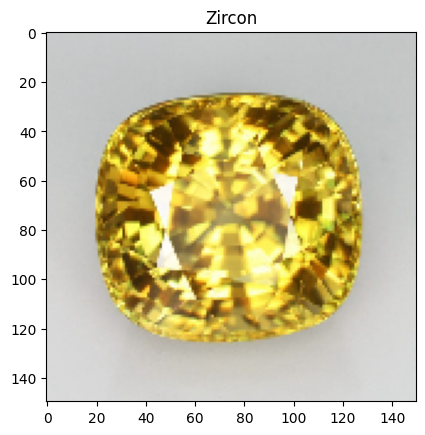

In [8]:
pred = model.predict(test_img)
label = np.argmax(pred, axis=1)[0]
_class = label_class[label]

plt.title(_class)
plt.imshow(cv2.resize(img, (150, 150)))

In [34]:
def prob_to_acc(pred):
  max_prob = np.max(pred)
  exp_probs = np.exp(pred - max_prob)
  accs = exp_probs / np.sum(exp_probs) * 100

  return accs

In [44]:
class_accs = prob_to_acc(pred)
class_accs = np.clip(class_accs, 0, 100) # optional

for i, a in enumerate(class_accs[0]):
  a = round(a, 2)
  print(f"Class: {label_class[i]}, Accuracy: {a:.2f}%")

Class: Almandine, Accuracy: 0.00%
Class: Emerald, Accuracy: 0.00%
Class: Ruby, Accuracy: 0.00%
Class: Sapphire, Accuracy: 0.05%
Class: Spessartite, Accuracy: 0.00%
Class: Topaz, Accuracy: 0.73%
Class: Tourmaline, Accuracy: 0.00%
Class: Zircon, Accuracy: 99.21%
